In [40]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [41]:
# Load the .npy file
cube_data = np.load("apple_datacube.npy")

# Ensure the data is 3D
if cube_data.ndim != 3:
    raise ValueError("The loaded .npy file must contain a 3D array.")

In [42]:
## Helper methods

def extract_roi(data, x_start, x_end, y_start, y_end):
    """
    Extract a region of interest (ROI) from the 3D data cube.
    """
    if x_start < 0 or x_end > data.shape[0] or y_start < 0 or y_end > data.shape[2]:
        raise ValueError("ROI coordinates are out of bounds.")
    return data[x_start:x_end, :, y_start:y_end]




def create_rgb_composite(data, bands=(30, 20, 10)):  # NIR, Red, Green
    """
    Create RGB composite from selected bands
    """
    rgb = np.stack([data[:, band, :] for band in bands], axis=-1)  # Correct indexing
    
    # Normalize each channel separately
    rgb_norm = rgb - rgb.min(axis=(0, 1), keepdims=True)
    rgb_norm = rgb_norm / rgb_norm.max(axis=(0, 1), keepdims=True)
    
    # Apply gamma correction
    gamma = 1.5
    rgb_final = np.power(rgb_norm, 1 / gamma)
    
    return rgb_final

def analyze_band_statistics(data):
    """
    Compute basic statistics for each band
    """
    stats = {
        'mean': np.mean(data, axis=(0, 2)),
        'std': np.std(data, axis=(0, 2)),
        'min': np.min(data, axis=(0, 2)),
        'max': np.max(data, axis=(0, 2))
    }
    return stats


In [43]:
# Get the number of bands
num_bands = cube_data.shape[1]  # Bands are along the second axis
print(f"The dataset contains {num_bands} bands (0 to {num_bands - 1}).")

# Select a specific band (e.g., along the Z-axis)
band_index = 180  # Change this to the desired band index
if band_index < 0 or band_index >= num_bands:
    raise IndexError(f"Band index {band_index} is out of bounds for the Z-axis with size {num_bands}.")

# Extract the selected band
band_data = cube_data[:, band_index, :]  # Slice along the second axis

# Normalize the band data for visualization
normalized_band = (band_data - band_data.min()) / (band_data.max() - band_data.min())


The dataset contains 224 bands (0 to 223).


In [44]:
print("Band statistics:")
stats = analyze_band_statistics(cube_data)
for band_index, stat in enumerate(stats['mean']):
    print(f"Band {band_index}: Mean = {stat:.4f}, Std = {stats['std'][band_index]:.4f}, Min = {stats['min'][band_index]}, Max = {stats['max'][band_index]}")
    

Band statistics:
Band 0: Mean = 325.5509, Std = 2005.9629, Min = 147, Max = 52987
Band 1: Mean = 235.5781, Std = 7.3657, Min = 147, Max = 257
Band 2: Mean = 237.9152, Std = 8.2255, Min = 155, Max = 263
Band 3: Mean = 239.6636, Std = 9.6442, Min = 153, Max = 278
Band 4: Mean = 241.2763, Std = 11.2776, Min = 154, Max = 294
Band 5: Mean = 243.2374, Std = 13.0248, Min = 157, Max = 280
Band 6: Mean = 245.9585, Std = 15.7446, Min = 153, Max = 282
Band 7: Mean = 248.8527, Std = 18.6856, Min = 157, Max = 296
Band 8: Mean = 252.2998, Std = 21.3112, Min = 158, Max = 299
Band 9: Mean = 255.3675, Std = 23.8919, Min = 151, Max = 308
Band 10: Mean = 256.4745, Std = 25.5314, Min = 155, Max = 323
Band 11: Mean = 258.8298, Std = 27.5026, Min = 155, Max = 319
Band 12: Mean = 262.1813, Std = 30.4046, Min = 154, Max = 324
Band 13: Mean = 266.3013, Std = 33.0722, Min = 156, Max = 348
Band 14: Mean = 277.5788, Std = 43.4607, Min = 156, Max = 365
Band 15: Mean = 283.7551, Std = 48.6465, Min = 157, Max = 380


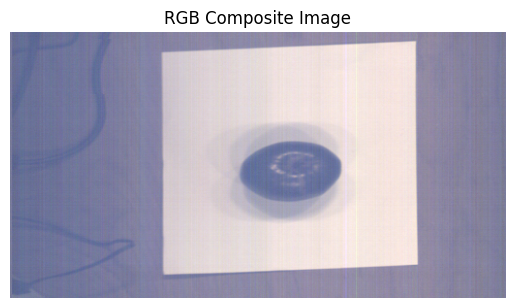

In [45]:
# Create an RGB composite image
rgb_image = create_rgb_composite(cube_data, bands=(30, 20, 10))  # NIR, Red, Green
plt.imshow(rgb_image)
plt.title("RGB Composite Image")
plt.axis("off")
plt.show()


In [46]:
x_start, x_end = 140, 140 + 20  # Define X-axis range for a 20-pixel square ROI
y_start, y_end = 160, 160 + 20  # Define Y-axis range for a 20-pixel square ROI
roi_data = extract_roi(cube_data, x_start, x_end, y_start, y_end)
print(f"Extracted ROI shape: {roi_data.shape}")

Extracted ROI shape: (20, 224, 20)


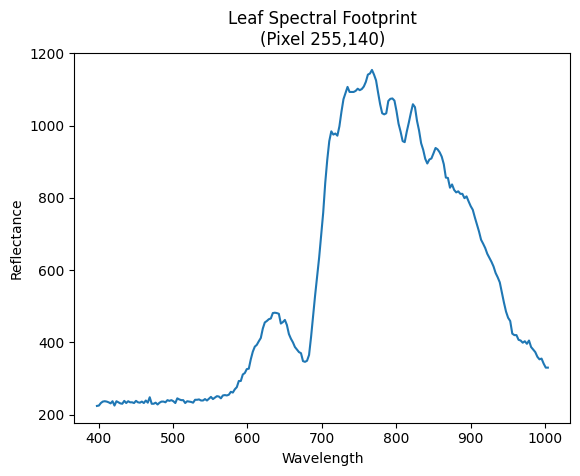

In [47]:
# Extract a single pixel's spectral data
pixel_y = 140
pixel_x = 255

pixel_data = cube_data[
    pixel_y:pixel_y+1,
    :,
    pixel_x:pixel_x+1
]

pixel_data_squeezed = np.squeeze(pixel_data)

# Generate a range of bands for plotting
bands = np.genfromtxt('bands.csv', delimiter=',')


plt.plot(bands, pixel_data_squeezed)
plt.title('Leaf Spectral Footprint\n(Pixel {},{})'.format(
    pixel_x, pixel_y))
plt.xlabel('Wavelength')
plt.ylabel('Reflectance')
plt.show()

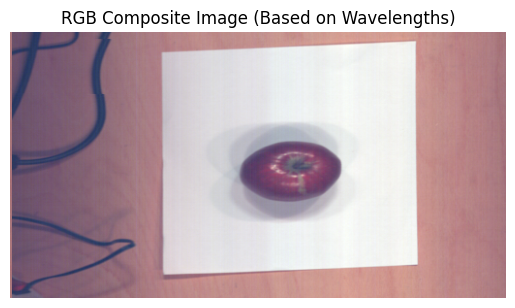

In [48]:
# Define the wavelength ranges for Red, Green, and Blue
red_range = (620, 750)   # Approximate range for red in nm
green_range = (495, 570) # Approximate range for green in nm
blue_range = (450, 495)  # Approximate range for blue in nm

# Find the indices of the bands that correspond to these wavelength ranges
red_band = np.argmin(np.abs(np.array(bands) - np.mean(red_range)))
green_band = np.argmin(np.abs(np.array(bands) - np.mean(green_range)))
blue_band = np.argmin(np.abs(np.array(bands) - np.mean(blue_range)))

# Create an RGB composite image using the identified bands
rgb_image = create_rgb_composite(cube_data, bands=(red_band, green_band, blue_band))

# Display the RGB image
plt.imshow(rgb_image)
plt.title("RGB Composite Image (Based on Wavelengths)")
plt.axis("off")
plt.show()

In [49]:
!pip install -U scikit-learn

In [50]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.6.1
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: BSD 3-Clause License
         
         Copyright (c) 2007-2024 The scikit-learn developers.
         All rights reserved.
         
         Redistribution and use in source and binary forms, with or without
         modification, are permitted provided that the following conditions are met:
         
         * Redistributions of source code must retain the above copyright notice, this
           list of conditions and the following disclaimer.
         
         * Redistributions in binary form must reproduce the above copyright notice,
           this list of conditions and the following disclaimer in the documentation
           and/or other materials provided with the distribution.
         
         * Neither the name of the copyright holder nor the names of its
           contributors may be used to endorse 

In [51]:
import sklearn
sklearn.show_versions()


System:
    python: 3.10.16 | packaged by Anaconda, Inc. | (main, Dec 11 2024, 16:19:12) [MSC v.1929 64 bit (AMD64)]
executable: c:\Users\moust\miniconda3\envs\hsi_env\python.exe
   machine: Windows-10-10.0.26100-SP0

Python dependencies:
      sklearn: 1.6.1
          pip: 25.0
   setuptools: 75.8.0
        numpy: 2.1.3
        scipy: 1.15.2
       Cython: None
       pandas: None
   matplotlib: 3.10.1
       joblib: 1.4.2
threadpoolctl: 3.6.0

Built with OpenMP: True

threadpoolctl info:
       user_api: blas
   internal_api: openblas
    num_threads: 12
         prefix: libscipy_openblas
       filepath: C:\Users\moust\miniconda3\envs\hsi_env\Lib\site-packages\numpy.libs\libscipy_openblas64_-c16e4918366c6bc1f1cd71e28ca36fc0.dll
        version: 0.3.27
threading_layer: pthreads
   architecture: Haswell

       user_api: openmp
   internal_api: openmp
    num_threads: 12
         prefix: vcomp
       filepath: C:\Users\moust\miniconda3\envs\hsi_env\Lib\site-packages\sklearn\.libs\vco

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import spectral as spy
import matplotlib.patches as mpatches


In [53]:
def hypermnf(cube, numComponents, mean_centered=True):
    if mean_centered:
        cube = cube.astype(np.float64)  # Convert to float64 to avoid type mismatch
        u = np.mean(cube, axis=0)
        cube -= u  # Subtract the mean

    # Reshape the cube to 2D (pixels x bands)
    reshaped_cube = cube.reshape(cube.shape[0], -1).T  # Transpose to (pixels, bands)

    # Compute the difference along the spectral axis
    V = np.diff(reshaped_cube, axis=0)

    # Compute the covariance matrix
    covariance_matrix = np.cov(V, rowvar=False)

    # Perform eigen decomposition
    eigvals, eigvecs = np.linalg.eigh(covariance_matrix)
    idx = np.argsort(eigvals)[::-1]  # Sort eigenvalues in descending order
    eigvecs = eigvecs[:, idx]

    # Select the top `numComponents` eigenvectors
    reduced_cube = np.dot(reshaped_cube, eigvecs[:, :numComponents])
    return reduced_cube.reshape(cube.shape[1], cube.shape[2], numComponents)

In [69]:
img = np.load("apple_datacube.npy")

# Swap the middle and last rows
middle_row = img.shape[0] // 2
img[[middle_row, -1]] = img[[-1, middle_row]]

# Exclude the last band if it contains NaN values
if np.isnan(img[:, :, -1]).any():
    img = img[:, :, :-1]

In [62]:
# Preprocess the image (e.g., using MNF/PCA for dimensionality reduction)

numComponents = 10  # Reduce to 3 components for clustering
reduced_img = hypermnf(img, numComponents)

In [63]:
# Reshape image for clustering
h, w, _ = reduced_img.shape
img_reshaped = reduced_img.reshape(-1, numComponents)

# Apply K-means clustering
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans_labels = kmeans.fit_predict(img_reshaped)

In [64]:
# Apply Gaussian Mixture Model for clustering
gmm = GaussianMixture(n_components=num_clusters, covariance_type='full', random_state=0)
gmm_labels = gmm.fit_predict(img_reshaped)

# Reshape the cluster labels to the original image shape
kmeans_image = kmeans_labels.reshape(h, w)
gmm_image = gmm_labels.reshape(h, w)

# Define class names (optional)
classNames = [f'class {i+1}' for i in range(num_clusters)]

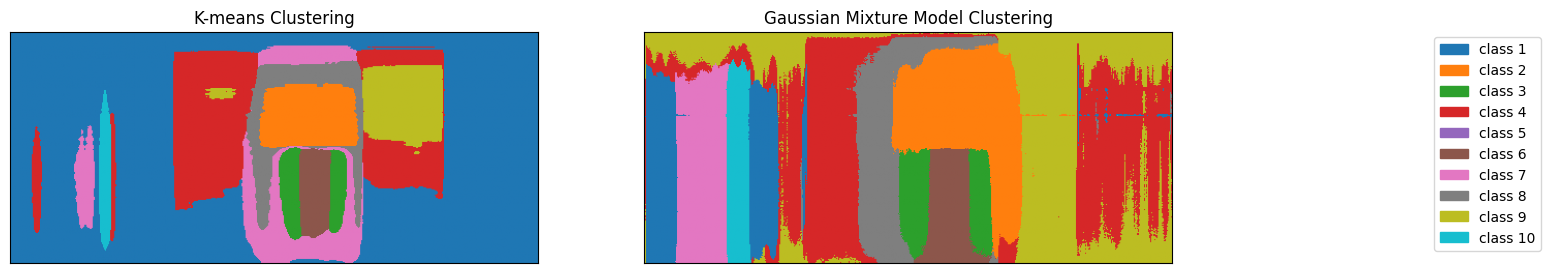

In [65]:
# Plot the results for comparison
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

# K-means result
ax[0].imshow(kmeans_image, cmap='tab10')
ax[0].set_title('K-means Clustering')
ax[0].set_aspect('equal', adjustable='box')
ax[0].set_xticks([])
ax[0].set_yticks([])

# GMM result
ax[1].imshow(gmm_image, cmap='tab10')
ax[1].set_title('Gaussian Mixture Model Clustering')
ax[1].set_aspect('equal', adjustable='box')
ax[1].set_xticks([])
ax[1].set_yticks([])

# Create dummy patches for legend
legend_patches = [mpatches.Patch(color=plt.cm.tab10(i), label=classNames[i]) for i in range(num_clusters)]

# Display legend
fig.legend(handles=legend_patches, loc='center right', bbox_to_anchor=(1.15, 0.5))
